In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [4]:
df = pd.read_csv("onlineShoppers.csv")

In [5]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [6]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
for c in df.columns:
    print("\n")
    print(c)
    print("Count of zeros: ")
    print((df[c]==0).sum())
 



Administrative
Count of zeros: 
5768


Administrative_Duration
Count of zeros: 
5903


Informational
Count of zeros: 
9699


Informational_Duration
Count of zeros: 
9925


ProductRelated
Count of zeros: 
38


ProductRelated_Duration
Count of zeros: 
755


BounceRates
Count of zeros: 
5518


ExitRates
Count of zeros: 
76


PageValues
Count of zeros: 
9600


SpecialDay
Count of zeros: 
11079


Month
Count of zeros: 
0


OperatingSystems
Count of zeros: 
0


Browser
Count of zeros: 
0


Region
Count of zeros: 
0


TrafficType
Count of zeros: 
0


VisitorType
Count of zeros: 
0


Weekend
Count of zeros: 
9462


Revenue
Count of zeros: 
10422


In [9]:
c = df.columns
for cc in c:
    print(cc)

Administrative
Administrative_Duration
Informational
Informational_Duration
ProductRelated
ProductRelated_Duration
BounceRates
ExitRates
PageValues
SpecialDay
Month
OperatingSystems
Browser
Region
TrafficType
VisitorType
Weekend
Revenue


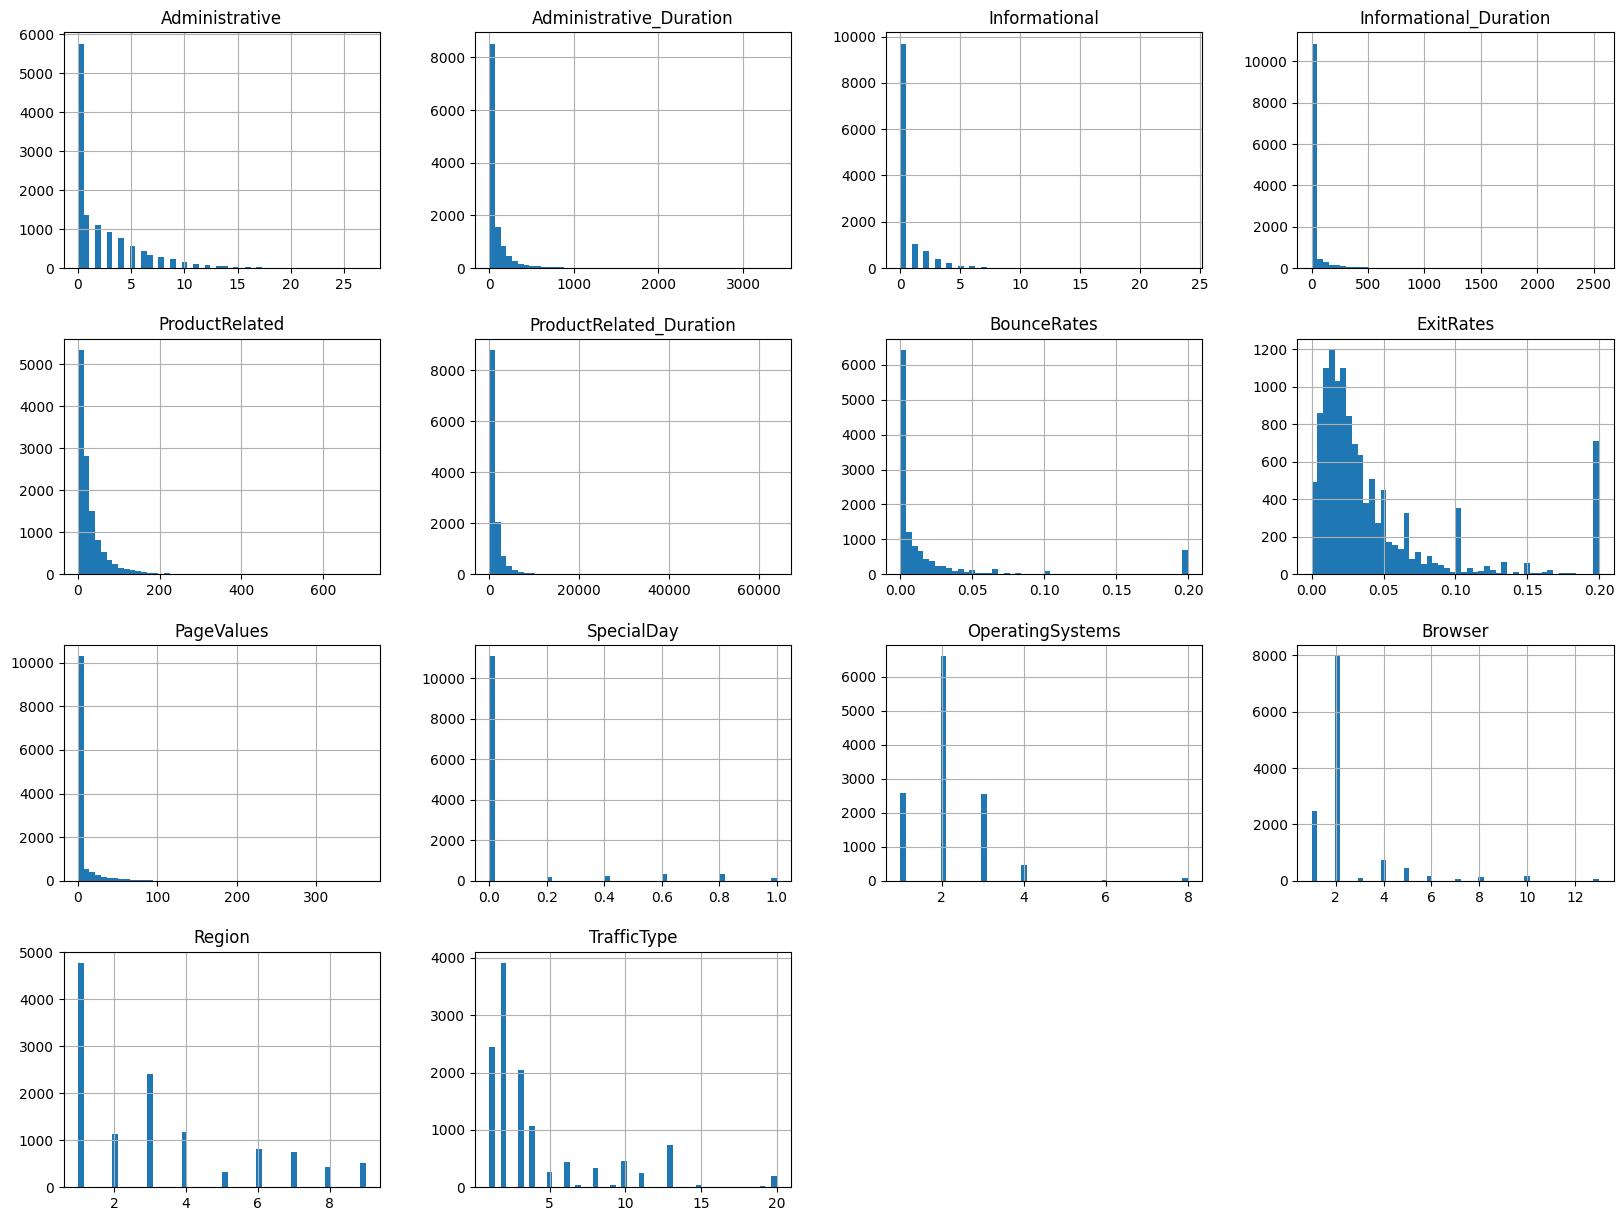

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Data is not evenly distributed. Count of 0s is more.


DATA PRE-PROCESSING

In [15]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df['Month']=df['Month'].map(Month)

VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
df['VisitorType']=df['VisitorType'].map(VisitorType)

d={True:1,False:0}
df['Weekend']=df['Weekend'].map(d)
df['Revenue']=df['Revenue'].map(d)

STANDARDISATION

In [16]:
from sklearn.preprocessing import StandardScaler 
  
scaler = StandardScaler() 
  
scaler.fit(df.drop('Revenue', axis = 1)) 
scaled_features = scaler.transform(df.drop('Revenue', axis = 1)) 
  
df_feat= pd.DataFrame(scaled_features, columns = df.columns[:-1]) 
df_feat.head() 

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay     Month  OperatingSystems  \
0     3.667189   3.229316   -0.317178   -0.308821 -1.665924         -1.233426   
1    -0.457683   1.171473   -0.317178   -0.308821 -1.665924         -0.136078   
2     3.667189   3.229316   -0.317178   -0.308821 -1.665924          2.058618   
3     0.573535   1.994610   -0.317178   -0.308821 -1.665924          0.961270   
4    -0.045196   0.142551   -0.317178   -0.308821 -1.665924          0.961270   

    Browser    Region  TrafficType  VisitorType   Weekend  
0 -0.790293 -0.894178    -0.762629     0.401025 -0.550552  
1 -0.207952 -0.894178    -0.514182     0.401025 -0.550552  
2 -0.790293  2.437081    -0.265735     0.401025 -0.550552  
3 -0.207952 -0.477771    -0.017289     0.401025 -0.550552  
4  0.374389 -0.894178    -0.017289     0.401025  1.816360

K = 17

In [18]:
from sklearn.model_selection import train_test_split 
import scikitplot as skplt
  
X_train, X_test, y_train, y_test = train_test_split( scaled_features, df['Revenue'], test_size = 0.30) 
  
from sklearn.neighbors import KNeighborsClassifier 
  
knn = KNeighborsClassifier(n_neighbors = 17) 
  
knn.fit(X_train, y_train) 
pred = knn.predict(X_test) 



In [19]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(pred,y_test)
print("Test accuracy using inbuilt method: ",acc)

Test accuracy using inbuilt method:  0.8805082454717491


In [20]:
knn.fit(X_train, y_train) 
predt = knn.predict(X_train) 

accp = accuracy_score(predt,y_train)
print("Train accuracy using inbuilt method: ",accp) 

Train accuracy using inbuilt method:  0.8864557988645579


              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3139
           1       0.75      0.31      0.44       560

    accuracy                           0.88      3699
   macro avg       0.82      0.65      0.69      3699
weighted avg       0.87      0.88      0.86      3699



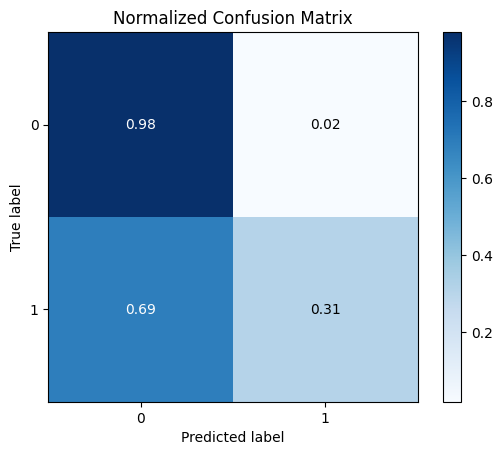

In [21]:
from sklearn.metrics import classification_report, confusion_matrix 
plt_2 = skplt.metrics.plot_confusion_matrix(y_test,pred, normalize=True)
print(classification_report(y_test, pred)) 

In [23]:
from sklearn.model_selection import train_test_split 
import scikitplot as skplt
  
X_train, X_test, y_train, y_test = train_test_split( scaled_features, df['Revenue'], test_size = 0.30) 
  
from sklearn.neighbors import KNeighborsClassifier 

for nn in range(1,18):
    knn = KNeighborsClassifier(n_neighbors = nn)

    print("__________________________________________________________\n")
    print("K = ",nn)
    knn.fit(X_train, y_train) 
    pred = knn.predict(X_test) 

    from sklearn.metrics import accuracy_score

    acc = accuracy_score(pred,y_test)
    print("Test accuracy using inbuilt method: ",acc)



__________________________________________________________

K =  1
Test accuracy using inbuilt method:  0.8477967018113004
__________________________________________________________

K =  2
Test accuracy using inbuilt method:  0.8680724520140578
__________________________________________________________

K =  3
Test accuracy using inbuilt method:  0.8726682887266829
__________________________________________________________

K =  4
Test accuracy using inbuilt method:  0.8745606920789403
__________________________________________________________

K =  5
Test accuracy using inbuilt method:  0.8759124087591241
__________________________________________________________

K =  6
Test accuracy using inbuilt method:  0.8761827520951608
__________________________________________________________

K =  7
Test accuracy using inbuilt method:  0.8799675587996756
__________________________________________________________

K =  8
Test accuracy using inbuilt method:  0.878345498783455
_________________

In [25]:
from scipy import stats
class kNN():
    '''k-Nearest Neighbours'''
    # Initialise
    def __init__(self, k=3, metric='euclidean', p=None):
        self.k = k
        self.metric = metric
        self.p = p
    
    # Euclidean distance (l2 norm)
    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))
    
    # Manhattan distance (l1 norm)
    def manhattan(self, v1, v2):
        return np.sum(np.abs(v1-v2))
    
    # Minkowski distance (lp norm)
    def minkowski(self, v1, v2, p=2):
        return np.sum(np.abs(v1-v2)**p)**(1/p)
        
    # Store train set
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    # Make predictions
    def predict(self, X_test):
        preds = []
        # Loop over rows in test set
        for test_row in X_test:
            nearest_neighbours = self.get_neighbours(test_row)
            majority = stats.mode(nearest_neighbours)[0][0]
            preds.append(majority)
        return np.array(preds)
    
    # Get nearest neighbours
    def get_neighbours(self, test_row):
        distances = list()
        
        # Calculate distance to all points in X_train
        for (train_row, train_class) in zip(self.X_train, self.y_train):
            if self.metric=='euclidean':
                dist = self.euclidean(train_row, test_row)
            elif self.metric=='manhattan':
                dist = self.manhattan(train_row, test_row)
            elif self.metric=='minkowski':
                dist = self.minkowski(train_row, test_row, self.p)
            else:
                raise NameError('Supported metrics are euclidean, manhattan and minkowski')
            distances.append((dist, train_class))
            
        # Sort distances
        distances.sort(key=lambda x: x[0])
        
        # Identify k nearest neighbours
        neighbours = list()
        for i in range(self.k):
            neighbours.append(distances[i][1])
            
        return neighbours

In [26]:
def accuracy(preds, y_test):
    return 100 * (preds == y_test).mean()

# Apply our kNN algorithm
for metric in ['euclidean', 'manhattan']:
    clf = kNN(k=5, metric=metric)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(f'Metric: {metric}, accuracy: {accuracy(preds, y_test):.3f} %')

IndexError: invalid index to scalar variable.

In [30]:
print(X_train)

[[-0.74679889  0.79980415 -1.30195179 -1.29480799]
 [ 0.76619627 -0.57128868  0.48167107  0.41842396]
 [-0.97956738  0.79980415 -1.19047536 -1.03123385]
 [-0.97956738  1.2568351  -1.30195179 -1.29480799]
 [ 0.18427505 -0.11425774  0.5931475   0.81378518]
 [-1.44510435  1.2568351  -1.52490464 -1.29480799]
 [-0.51403041  1.94238152 -1.35769    -1.03123385]
 [-0.86318314  0.79980415 -1.24621357 -1.29480799]
 [-0.16487768 -0.11425774  0.25871821  0.02306274]
 [-0.51403041  1.48535057 -1.24621357 -1.29480799]
 [ 0.99896475  0.57128868  1.09479142  1.20914639]
 [-0.04849343 -0.79980415  0.09150357  0.02306274]
 [-1.44510435  0.34277321 -1.30195179 -1.29480799]
 [ 0.99896475  0.11425774  1.03905321  1.60450761]
 [ 0.18427505 -1.94238152  0.14724178 -0.24051141]
 [-0.86318314  1.02831963 -1.30195179 -1.16302092]
 [-0.39764616 -1.2568351   0.14724178  0.15484981]
 [-0.97956738 -2.39941246 -0.13144929 -0.24051141]
 [ 0.64981202 -0.57128868  1.03905321  1.34093347]
 [-0.86318314  1.71386604 -1.02

Using user defined method:

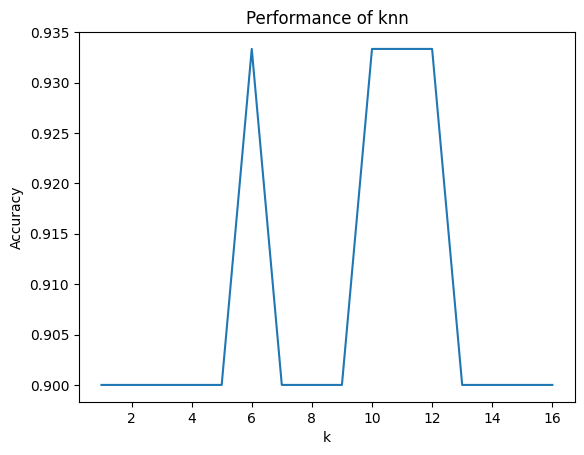





K=  1  | Accuracy:  0.9

K=  2  | Accuracy:  0.9

K=  3  | Accuracy:  0.9

K=  4  | Accuracy:  0.9

K=  5  | Accuracy:  0.9333333333333333

K=  6  | Accuracy:  0.9

K=  7  | Accuracy:  0.9

K=  8  | Accuracy:  0.9

K=  9  | Accuracy:  0.9333333333333333

K=  10  | Accuracy:  0.9333333333333333

K=  11  | Accuracy:  0.9333333333333333

K=  12  | Accuracy:  0.9

K=  13  | Accuracy:  0.9

K=  14  | Accuracy:  0.9

K=  15  | Accuracy:  0.9


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def most_common(lst):
    return max(set(lst), key=lst.count)
def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy




ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)


accuracies = []
ks = range(1, 17)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

print("\n\n")

for a in range(1,16): 
    print("\nK= ",a,end = " ")
    print(" | Accuracy: ",accuracies[a])